In [9]:
import pandas as pd
import numpy as np

# Step 1: Read the CSV file and save data as df
df = pd.read_csv('Electricitydemand_abstract_v2.csv')

# Step 2: Convert the 'values' column to numeric type
df['values'] = pd.to_numeric(df['values'], errors='coerce')

# Step 3: Choose rows with 'Trina EPD' in df['ref'] and assign as df_EPD
df_EPD = df[df['ref'] == 'Trina EPD']

# Step 4: Choose rows with 'Material_low' and 'Material_high' in df_EPD['type'] and assign as df_matlow
df_matlow = df_EPD[df_EPD['type'].isin(['Material_low', 'Material_high'])]

# Step 5: Take mean values from column 'values' for each one with the same row in df_matlow['Producing']
df_mat = df_matlow.groupby('Producing')['values'].mean().reset_index()
df_lab = df_matlow.groupby('Producing').mean().reset_index()

# The 'df_mat' DataFrame will contain the producing groups with their respective mean values from the 'values' column.

# Step 6: Calculate max-min values from the 'values' column for each 'Producing' group and assign to df_err
df_err = df_matlow.groupby('Producing')['values'].agg([('Min', 'min'), ('Max', 'max')]).reset_index()
df_diff=df_err['Max']-df_err['Min']

In [10]:
df_lab['Producing']

0                     Al frame
1                    Backsheet
2                          EVA
3                        Glass
4                          POE
5    PV component/junction box
6                           Si
7     Tin plated copper ribbon
8                   busbar(Cu)
9                   silica gel
Name: Producing, dtype: object

ValueError: 'yerr' (shape: (2, 10)) must be a scalar or a 1D or (2, n) array-like whose shape matches 'y' (shape: (9,))

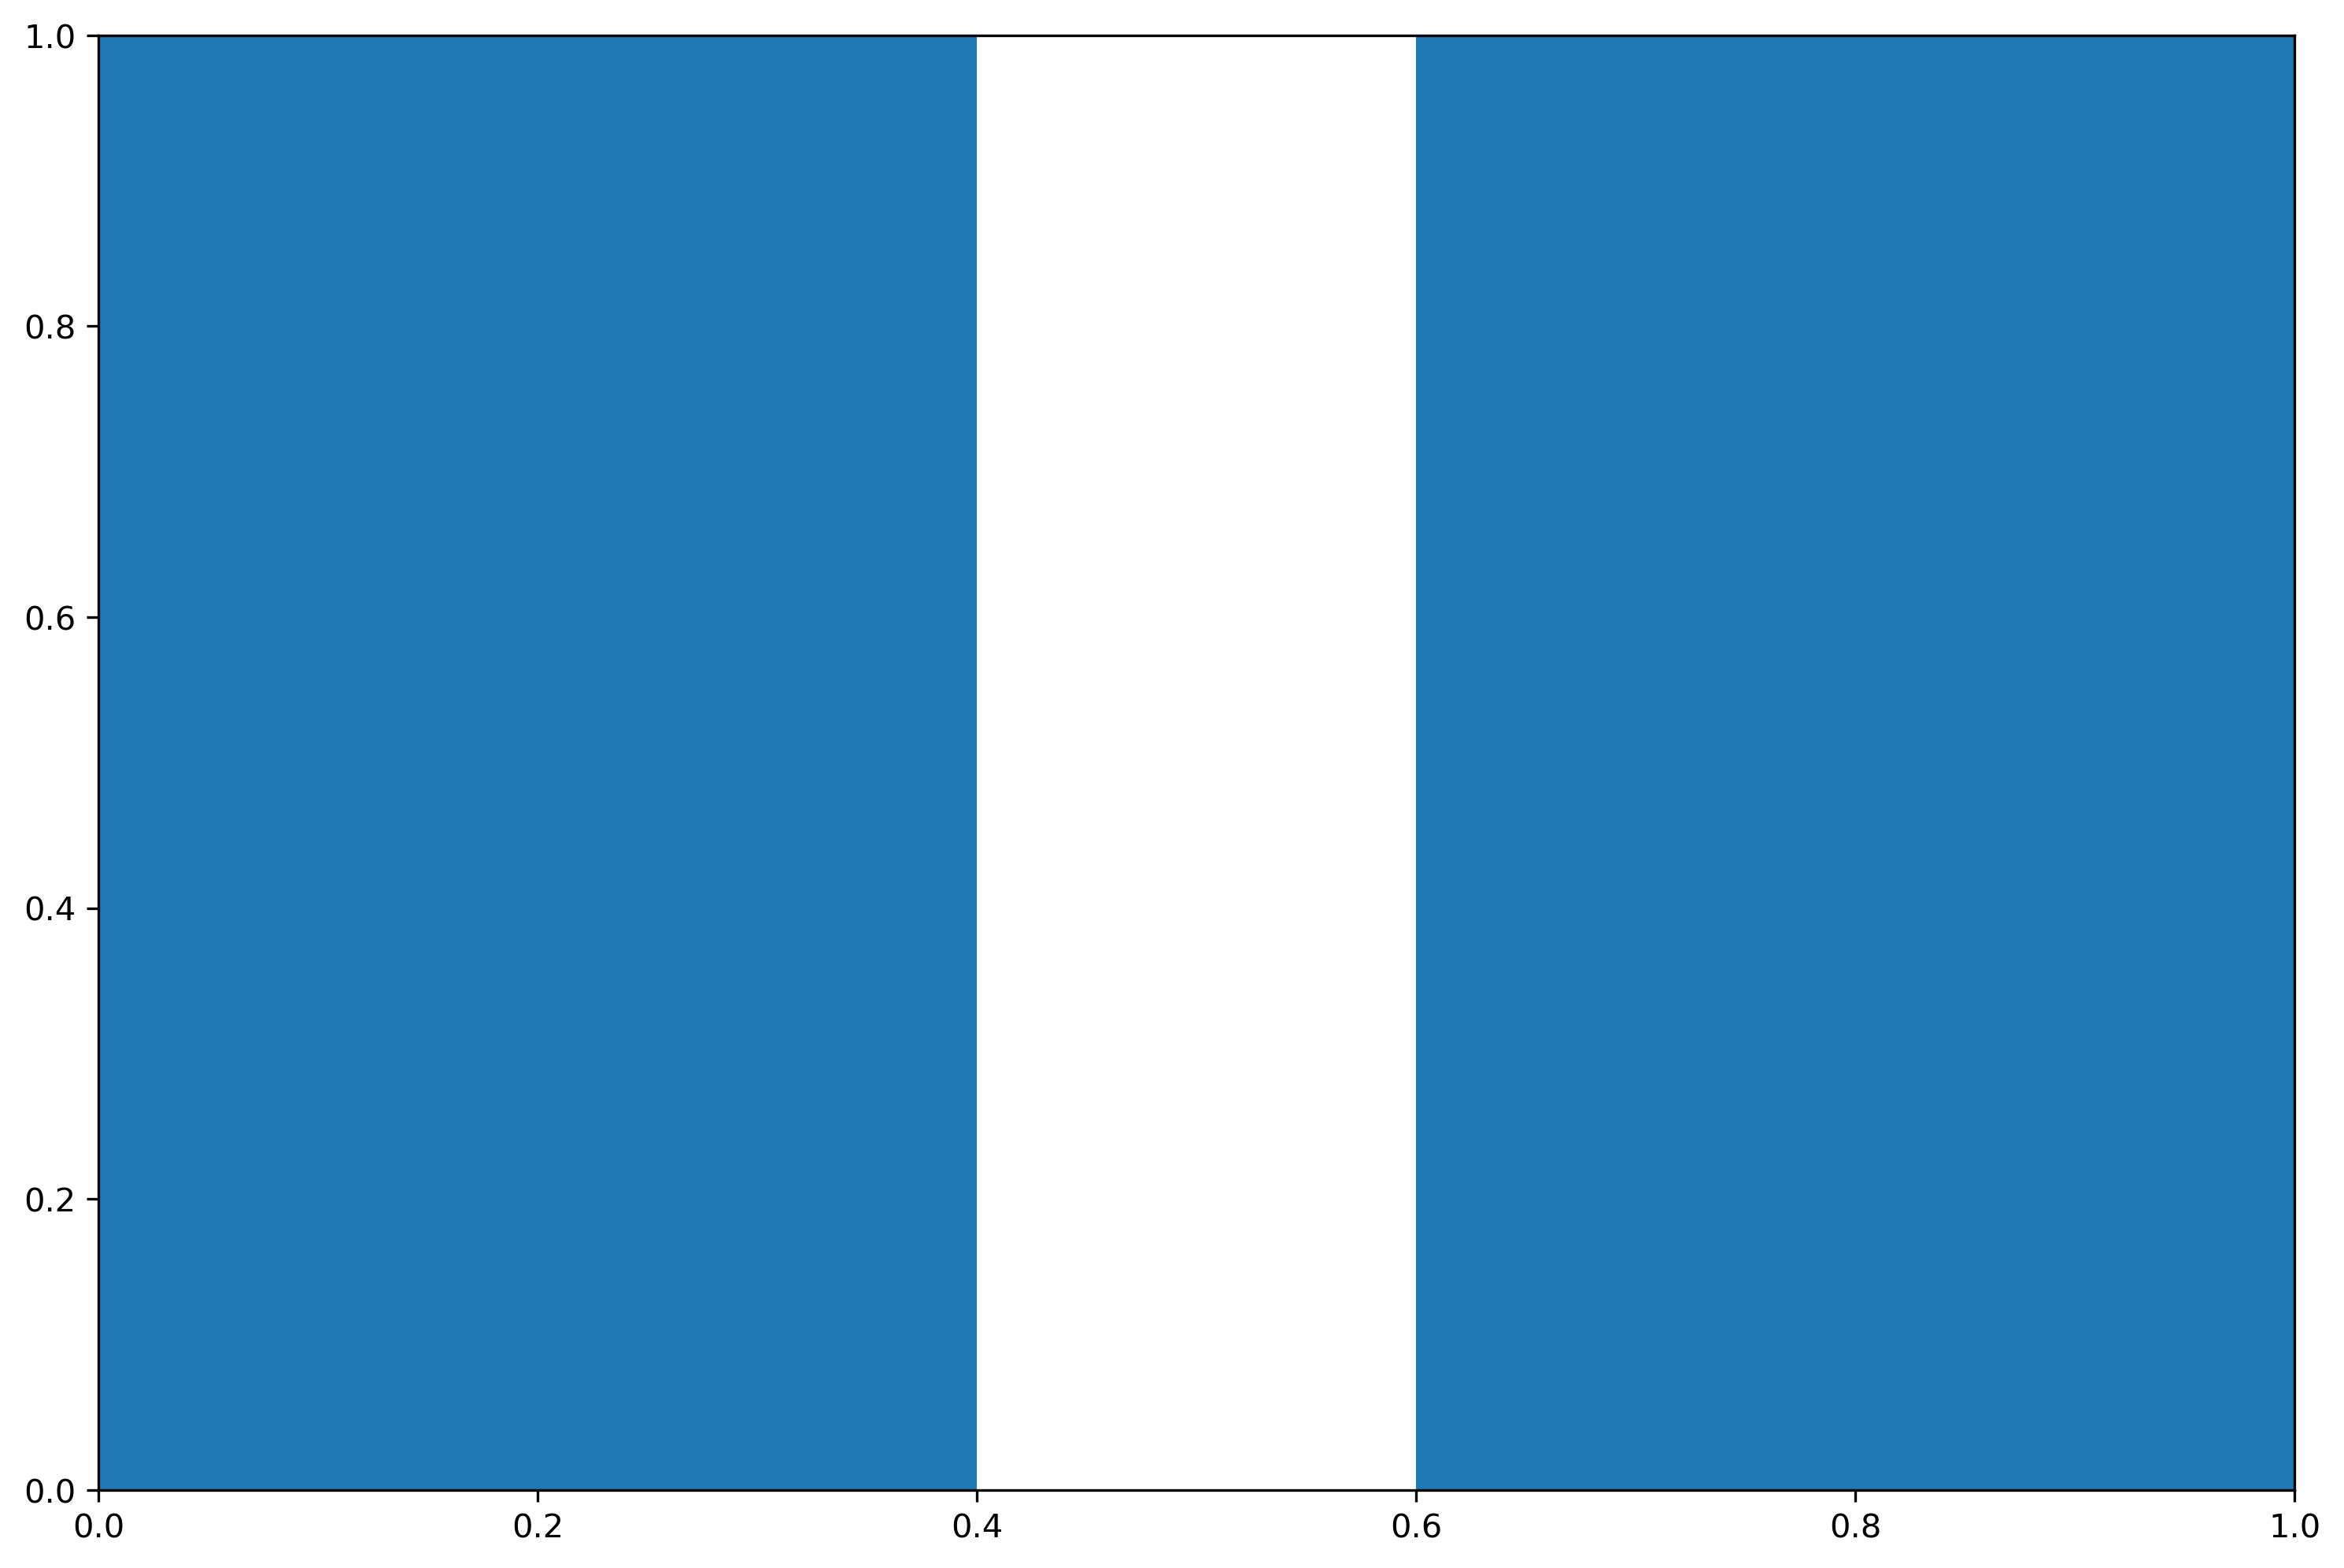

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
df_mat = df_mat.dropna(subset=['values'])
# Step 7: Create the bar chart with error bars
fig, ax = plt.subplots(figsize=(12, 8), dpi=300)
x = range(len(df_mat))
bar_chart = ax.bar(x, df_mat['values'], tick_label=df_mat['Producing'], yerr=[df_mat['values'] - df_err['Min'], df_err['Max'] - df_mat['values']], capsize=5)
ax.set_xlabel('Producing', fontsize=20)
ax.set_ylabel('Mean Values', fontsize=20)
ax.set_title('Bar Chart with Error Bars', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(df_mat['Producing'], rotation=45, ha='right', fontsize=14)
ax.yaxis.set_tick_params(labelsize=14)


# Step 8: Add a pie chart within the bar chart

total = df_mat['values'].sum()

pie_data = (df_mat['values'] / total) * 100
pie_labels = df_mat['Producing']
ax_pie = inset_axes(ax, width='40%', height='40%', loc='upper center')
ax_pie.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90)
ax_pie.set_title('Pie Chart', fontsize=14)

plt.tight_layout()

# Step 8: Save the plot as 'materialconsumption.png'
plt.savefig('materialconsumption.png')

# Step 9: Show the plot
plt.show()




In [ ]:
bar_chart = ax.bar(x, df_mat['values'], tick_label=df_mat['Producing'], yerr=[df_mat['values'] - df_err['Min'], df_err['Max'] - df_mat['values']], capsize=5)



/var/folders/j7/1_dd97dd5_d8tjxk5rgc4g200000gn/T/ipykernel_18015/1487066408.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


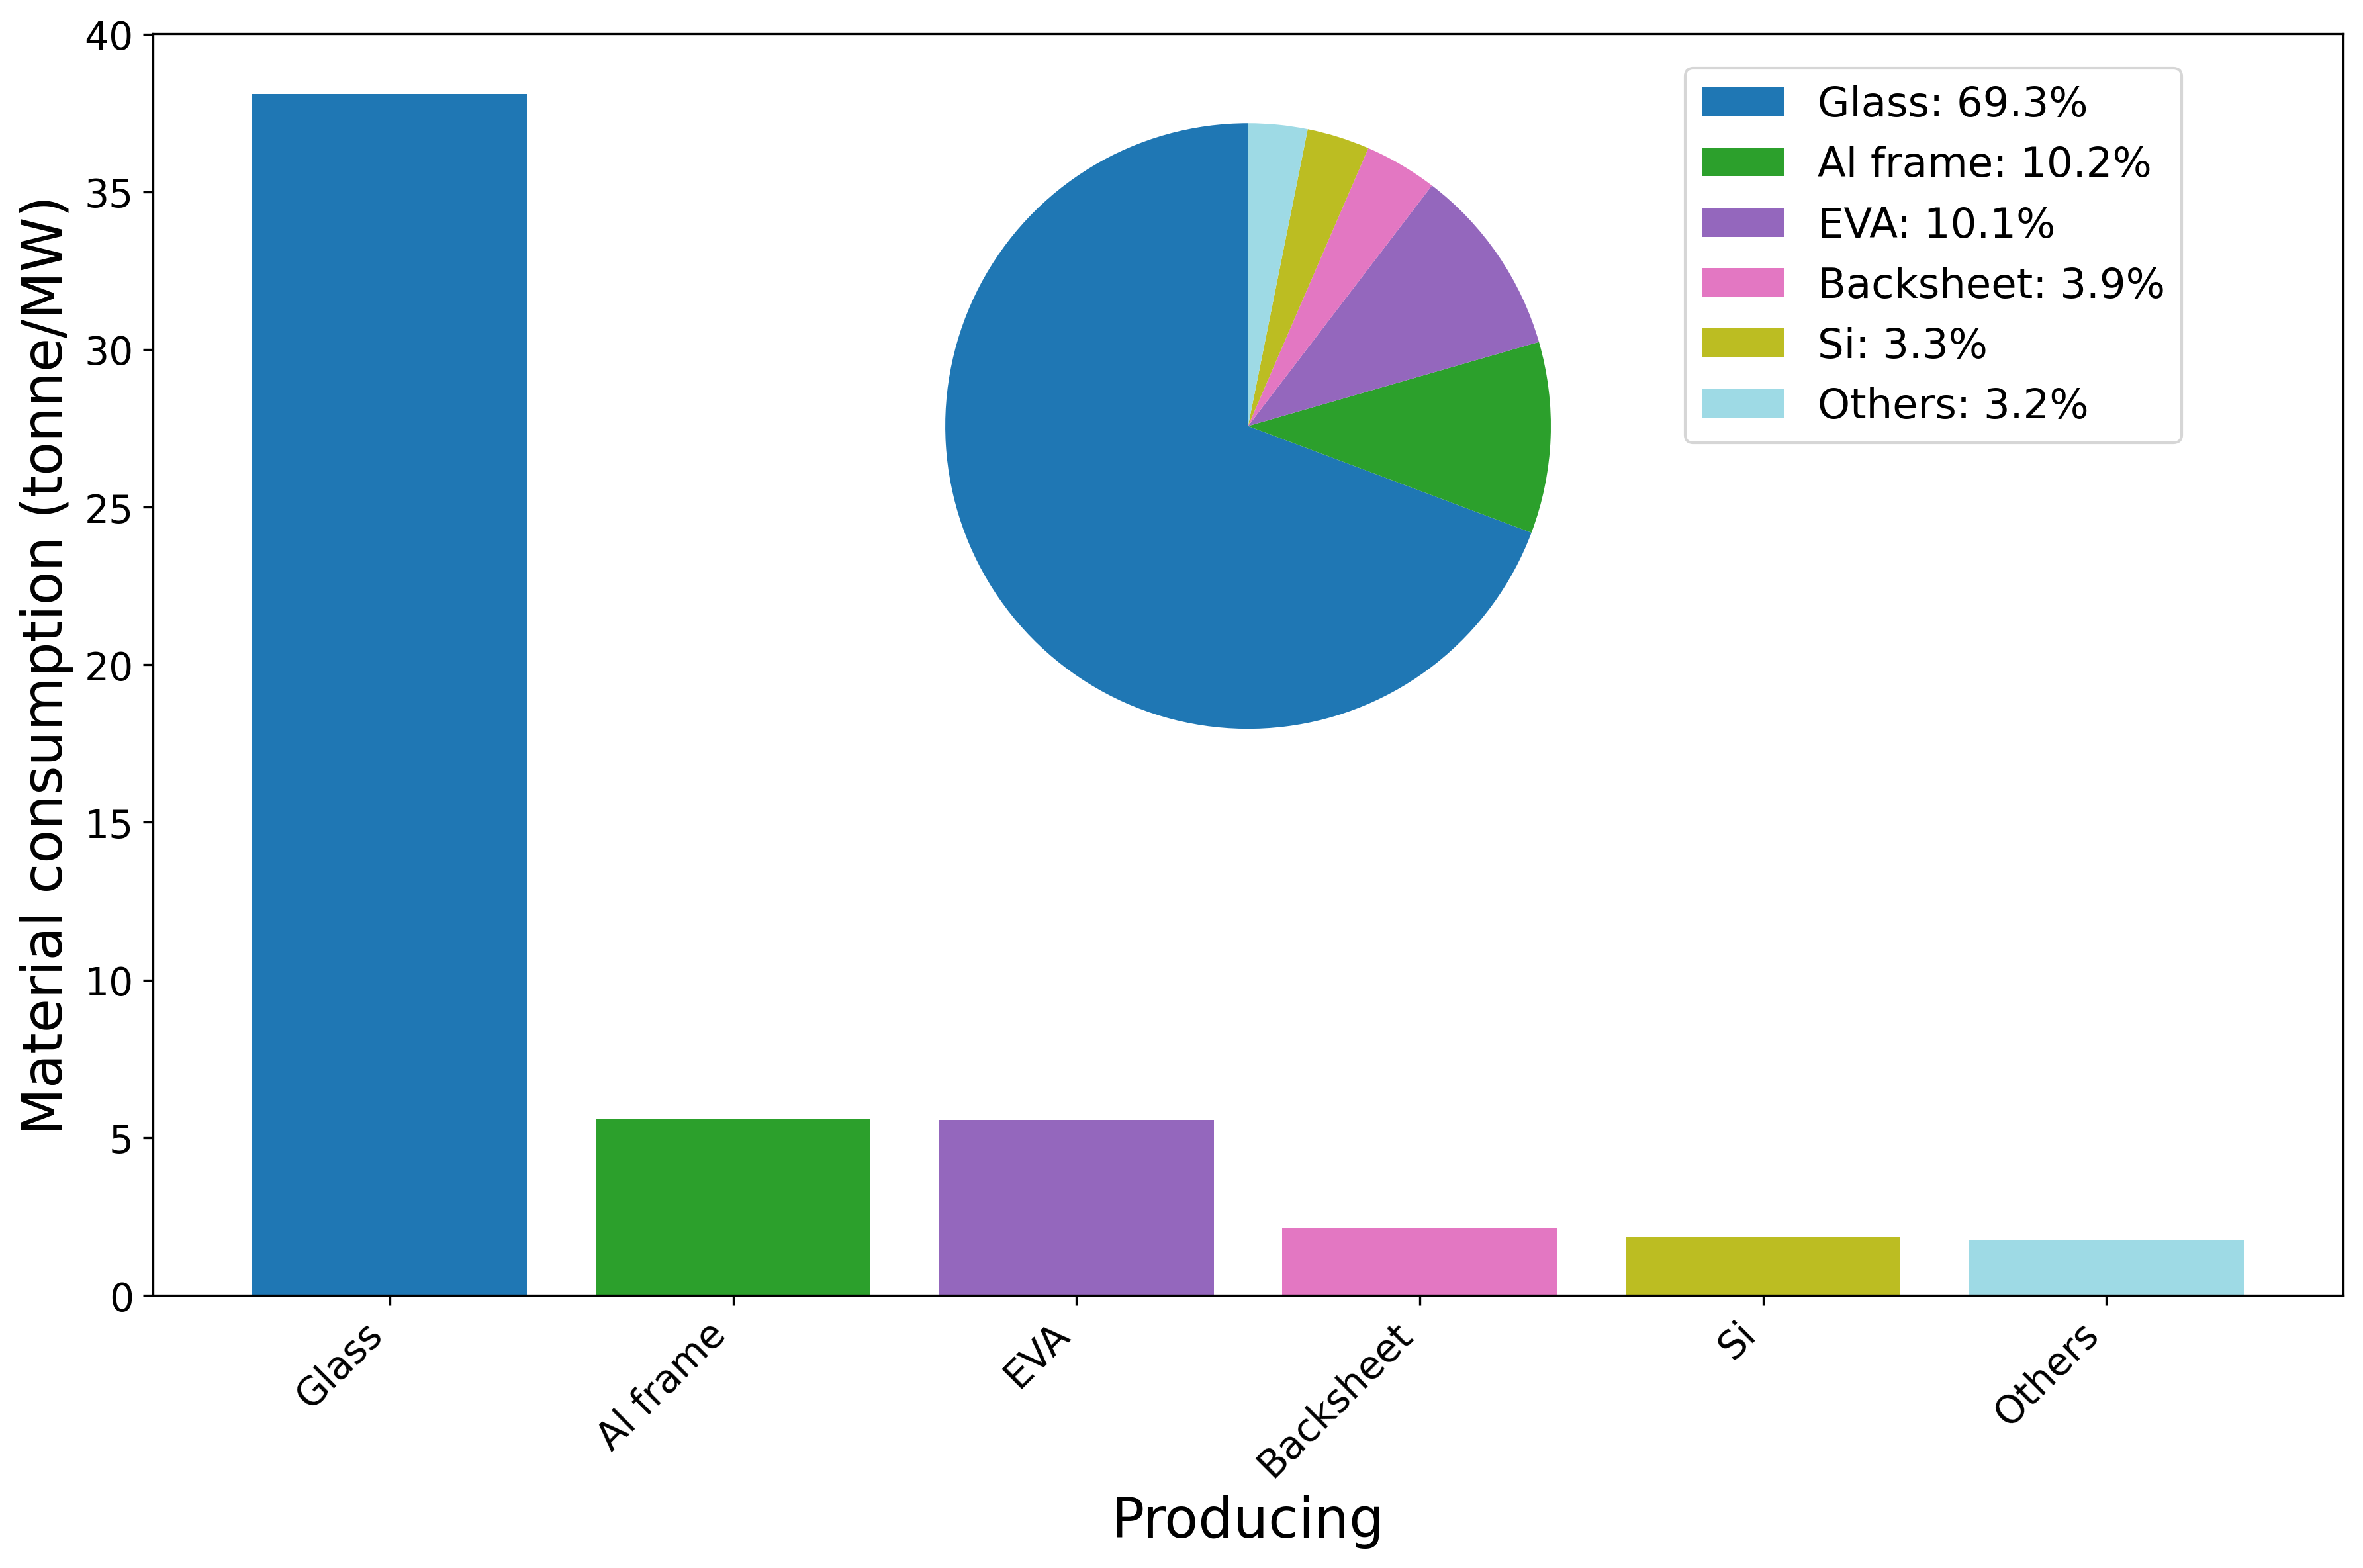

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import matplotlib.cm as cm
# Step 7: Drop rows with NaN values from df_mat before calculating the pie_data
df_mat = df_mat.dropna(subset=['values'])
# Step 7: Drop rows with NaN values from df_mat before calculating the pie_data
df_mat = df_mat.dropna(subset=['values'])

# Step 8: Sort the DataFrame by the 'values' column in descending order
df_mat = df_mat.sort_values(by='values', ascending=False)
# Step 9: Consider only the top 5 rows

top5_df_mat = df_mat.head(5)

# Step 10: Combine the rest of the values and add a row for 'others'
remaining_values = df_mat.iloc[5:]['values'].sum()
others_row = pd.DataFrame({'Producing': ['Others'], 'values': [remaining_values]})

# Step 11: Concatenate the top 5 rows and the 'others' row
df_mat = pd.concat([top5_df_mat, others_row], ignore_index=True)

# Step 8: Create the bar chart with error bars
fig, ax = plt.subplots(figsize=(12, 8), dpi=300)
# x = range(len(df_mat))
x = np.arange(len(df_mat))
bar_colors = cm.get_cmap('tab20')(np.linspace(0, 1, len(df_mat)))  # Generate different colors for each bar
bar_chart = ax.bar(x, df_mat['values'], tick_label=df_mat['Producing'],  capsize=5, color=bar_colors)

# bar_chart = ax.bar(x, df_mat['values'], tick_label=df_mat['Producing'], capsize=5)
ax.set_xlabel('Producing', fontsize=20)
ax.set_ylabel('Material consumption (tonne/MW)', fontsize=20)
# ax.set_title('Bar Chart with Error Bars', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(df_mat['Producing'], rotation=45, ha='right', fontsize=14)
ax.yaxis.set_tick_params(labelsize=14)

# Step 9: Calculate normalized pie chart data after dropping NaN values
total = df_mat['values'].sum()
pie_data = (df_mat['values'] / total) * 100
pie_labels = df_mat['Producing']

pie_combined_data_labels = list(zip(pie_data, pie_labels))
sorted_pie_combined_data_labels = sorted(pie_combined_data_labels, reverse=True)

sorted_pie_data = [data for data, _ in sorted_pie_combined_data_labels]
sorted_pie_labels = [label for _, label in sorted_pie_combined_data_labels]
pie_combined_labels = [f'{label}: {value:.1f}%' for label, value in zip(sorted_pie_labels, sorted_pie_data)]

# Step 11: Create the pie chart
ax_pie = inset_axes(ax, width='60%', height='60%', loc='upper center')
wedges, texts = ax_pie.pie(sorted_pie_data, labels=None, startangle=90,  pctdistance=0.85, colors=bar_colors)
ax_pie.legend(wedges, pie_combined_labels, loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=15)
# ax_pie.set_title('Pie Chart', fontsize=14)

plt.tight_layout()

# Step 11: Save the plot as 'materialconsumption.png'
plt.savefig('materialconsumption.png')

# Step 12: Show the plot
plt.show()

In [13]:
# Step 3: Filter rows with 'electricity' in 'ref' and 'elect/kg' in 'type' and assign as df_elect
df_elect = df[(df['ref'] == 'electricity') & (df['type'] == 'elect/kg')]

# Step 16: Merge df_elect with df_mat_combined on 'Producing' column
df_elect_merged = df_elect.merge(df_mat, on='Producing', suffixes=('_elect', '_mat'))

# Step 17: Calculate the ratio of 'values_elect' to 'values_mat'
df_elect_merged['Ratio'] = df_elect_merged['values_mat']* df_elect_merged['values_elect'] 
df_elect_merged.dropna()
# Display the resulting DataFrame
df_elect_merged

,Producing,values_elect,type,unit,ref,Specific,Unnamed: 6,Unnamed: 7,Unnamed: 8,values_mat,Ratio
0,Si,207.270,elect/kg,kWh/kg,electricity,NaN,NaN,NaN,NaN,1.839327,381.237319
1,Al frame,14.114,elect/kg,kWh/kg,electricity,https://international-aluminium.org/statistics...,NaN,NaN,NaN,5.616486,79.271089
2,Glass,0.267,elect/kg,kWh/kg,electricity,NaN,NaN,NaN,NaN,38.105187,10.174085


In [14]:
 df[(df['ref'] == 'electricity') & (df['type'] == 'elect/kg')]

,Producing,values,type,unit,ref,Specific,Unnamed: 6,Unnamed: 7,Unnamed: 8
30,Si,207.270,elect/kg,kWh/kg,electricity,NaN,NaN,NaN,NaN
31,MG-Si,11.300,elect/kg,kWh/kg,electricity,NaN,NaN,NaN,NaN
32,poly-Si,45.000,elect/kg,kWh/kg,electricity,NaN,NaN,NaN,NaN
33,ingot,32.000,elect/kg,kWh/kg,electricity,NaN,NaN,NaN,NaN
34,wafer,4.920,elect/kg,kWh/kg,electricity,NaN,NaN,NaN,NaN
35,Al frame,14.114,elect/kg,kWh/kg,electricity,https://international-aluminium.org/statistics...,NaN,NaN,NaN
38,Glass,0.267,elect/kg,kWh/kg,electricity,NaN,NaN,NaN,NaN


In [17]:
df_elect_merged['Ratio']

0    381.237319
1     79.271089
2     10.174085
Name: Ratio, dtype: float64

In [26]:
x

array([0, 1, 2])

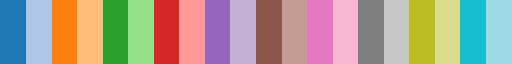

In [28]:
plt.cm.tab20

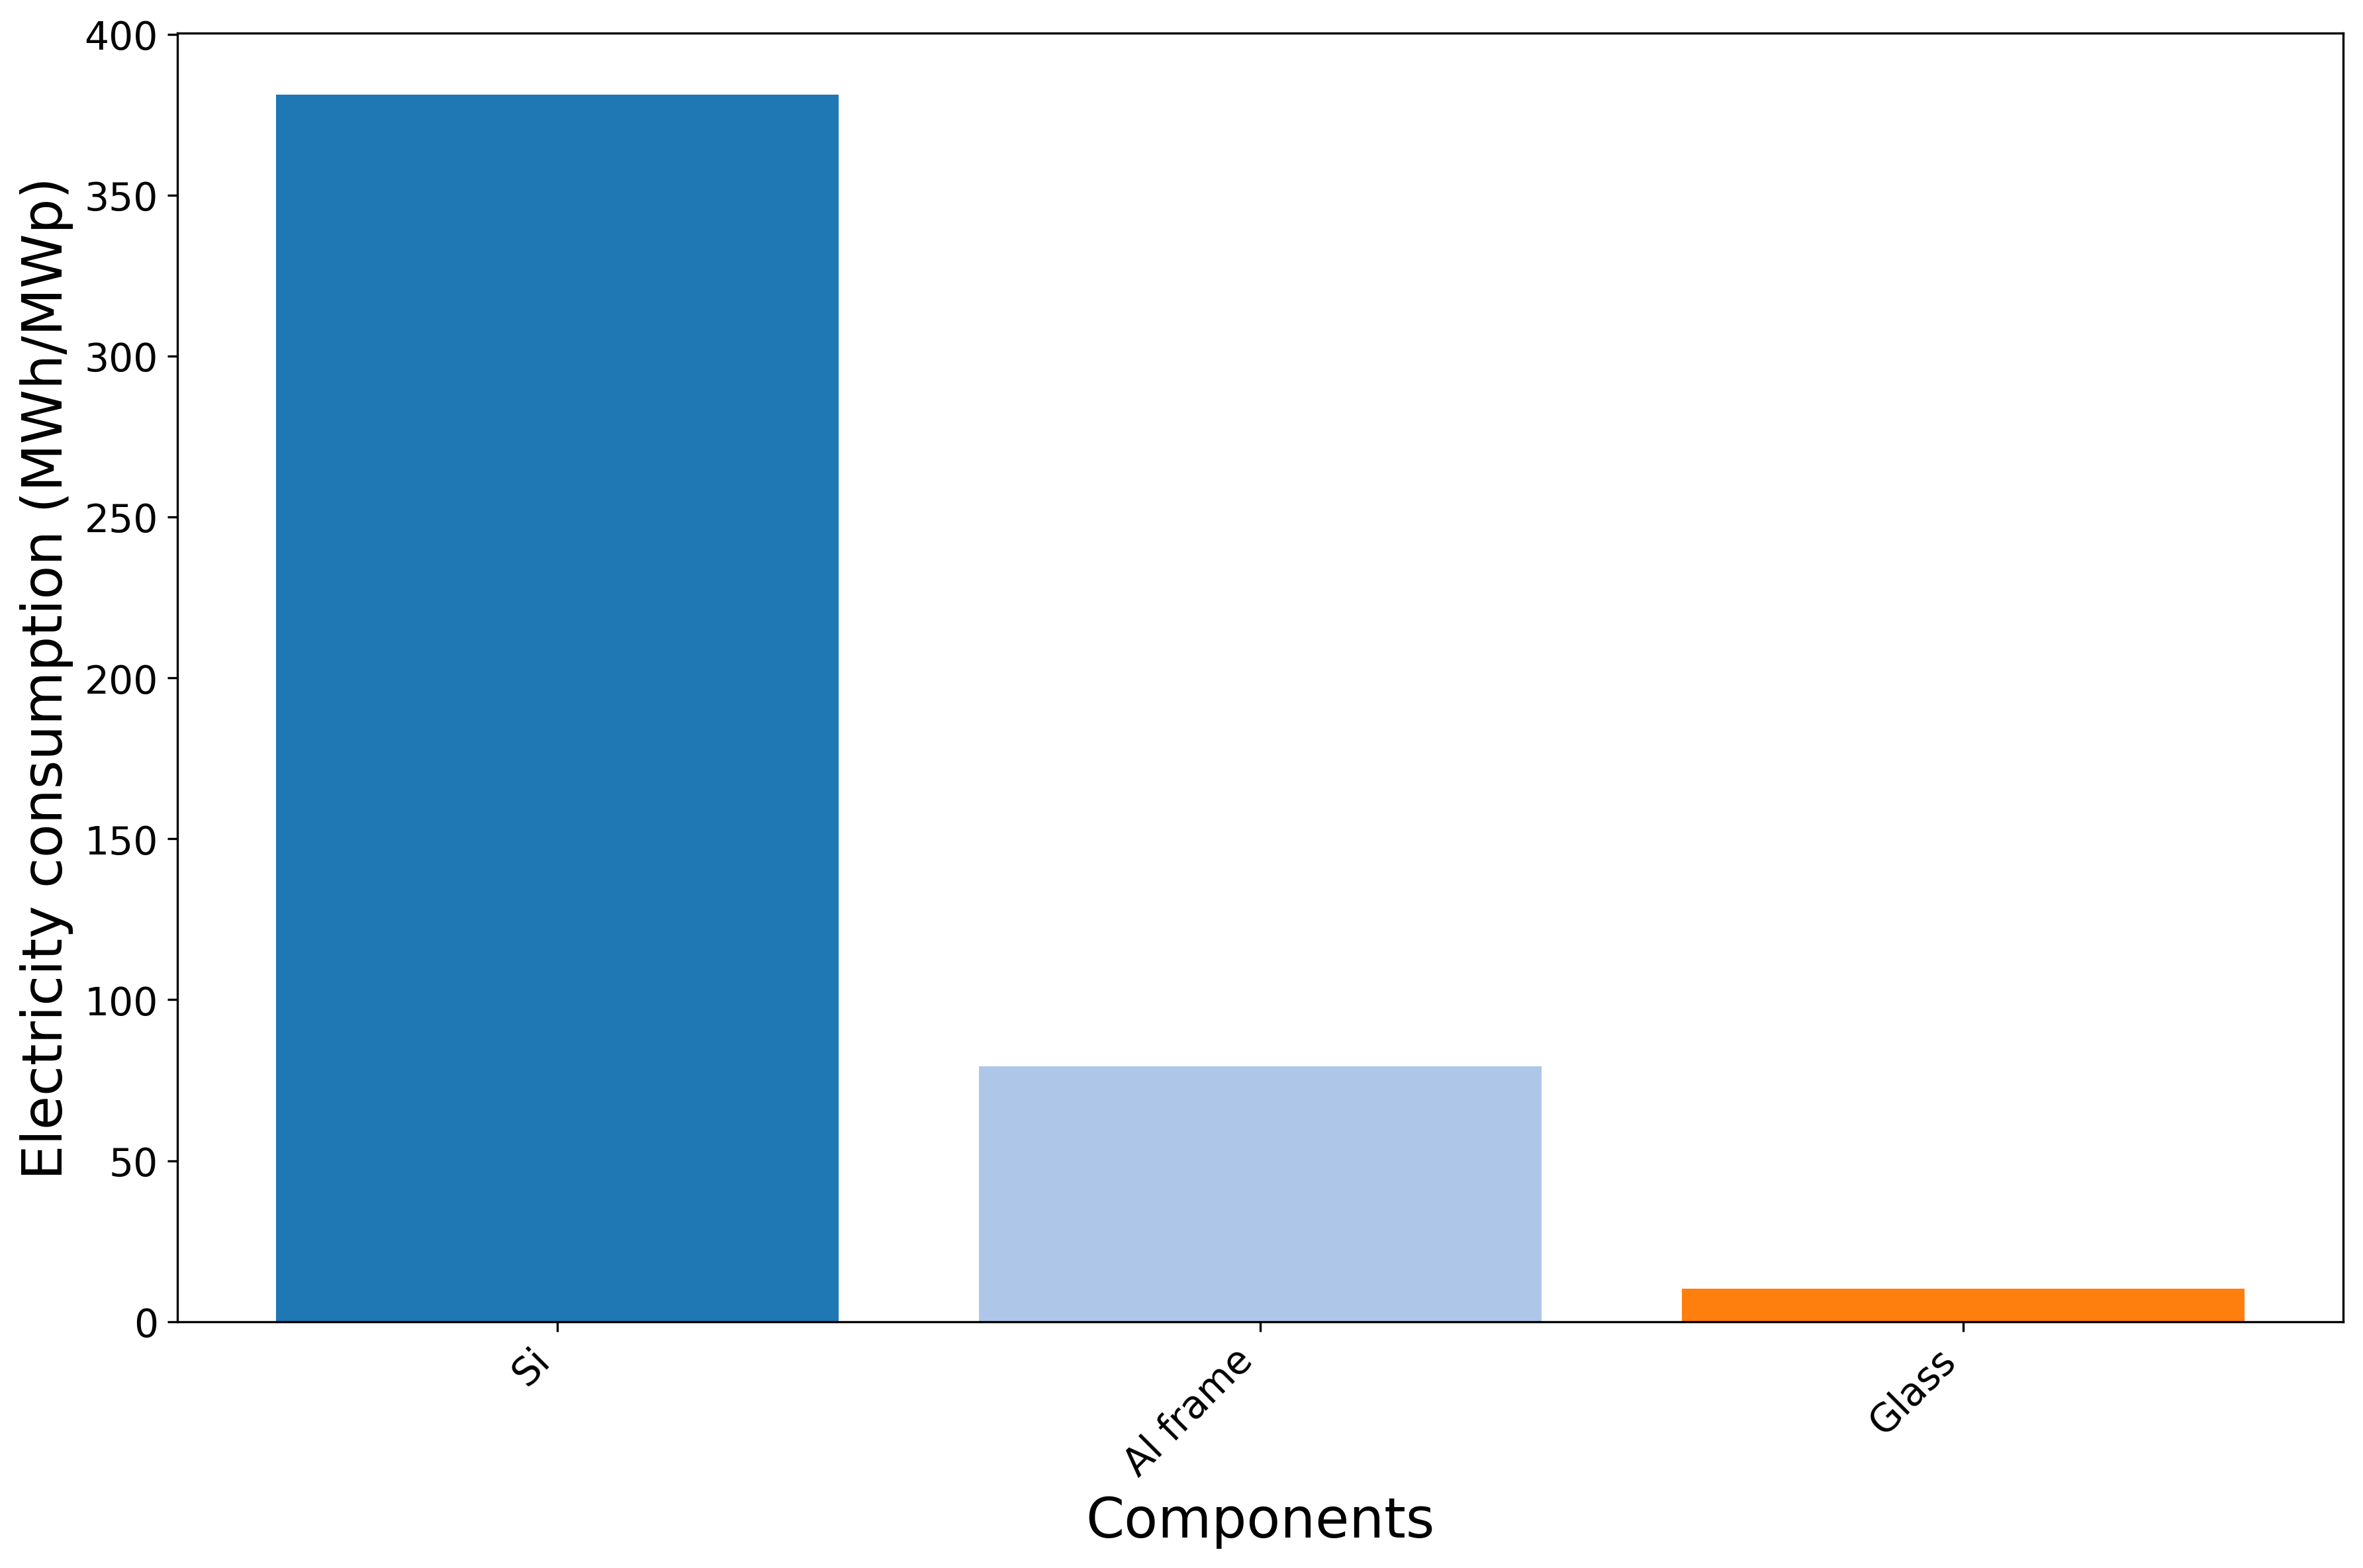

In [18]:

# Step 19: Create the bar chart
fig, ax = plt.subplots(figsize=(12, 8), dpi=300)

# Plot the bars with sorted 'Ratio' values and use 'Producing' as labels
x = np.arange(len(df_elect_merged))
bar_colors = plt.cm.tab20(x)
bar_chart = ax.bar(x, df_elect_merged['Ratio'], tick_label=df_elect_merged['Producing'], color=bar_colors)
ax.set_xlabel('Components', fontsize=20)
ax.set_ylabel('Electricity consumption (MWh/MWp)', fontsize=20)
# ax.set_title('Ratio of Values', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(df_elect_merged['Producing'], rotation=45, ha='right', fontsize=14)
ax.yaxis.set_tick_params(labelsize=14)

plt.tight_layout()